In [137]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For time stamps
from datetime import datetime

In [147]:
df = pd.read_csv('./data/1hour.csv')
df.columns = ['open_time', 'open_price', 'high_price', 'low_price', 'close_price', 'volume', 'close_time']
df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')
df['open_time'] = pd.to_datetime(df['open_time'] * 1000, unit='ms')
df.head()

,open_time,open_price,high_price,low_price,close_price,volume,close_time
0,2017-08-17 05:00:00,301.61,303.28,300.00,303.10,377.67246,2017-08-17 05:59:59.999
1,2017-08-17 06:00:00,302.40,304.44,301.90,302.68,303.86672,2017-08-17 06:59:59.999
2,2017-08-17 07:00:00,302.68,307.96,302.60,307.96,754.74510,2017-08-17 07:59:59.999
3,2017-08-17 08:00:00,307.95,309.97,307.00,308.62,150.75029,2017-08-17 08:59:59.999
4,2017-08-17 09:00:00,308.62,312.00,308.62,310.00,469.27879,2017-08-17 09:59:59.999


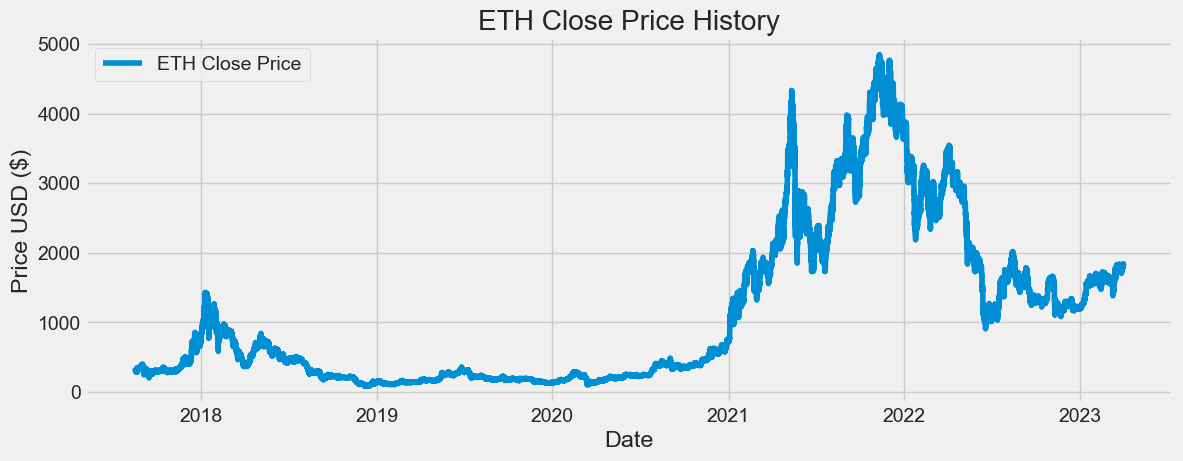

In [148]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(df['close_time'], df['close_price'], label='ETH Close Price')
plt.title('ETH Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.legend(loc='upper left')
plt.show()

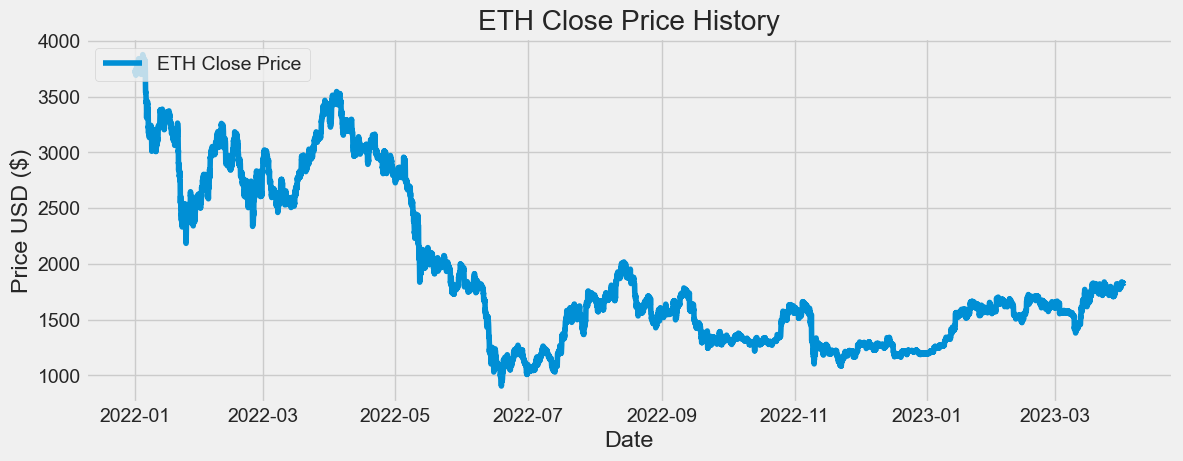

In [150]:
sliced_df = df[df['close_time'] >= '2022-01-01']
plt.figure(figsize=(12.5, 4.5))
plt.plot(sliced_df['close_time'], sliced_df['close_price'], label='ETH Close Price')
plt.title('ETH Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.legend(loc='upper left')
plt.show()


/var/folders/fx/3kl00f6x4bq3c7ymjd8v16qr0000gn/T/ipykernel_52720/809148858.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced_df[column_name] = sliced_df['close_price'].rolling(ma).mean()
/var/folders/fx/3kl00f6x4bq3c7ymjd8v16qr0000gn/T/ipykernel_52720/809148858.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced_df[column_name] = sliced_df['close_price'].rolling(ma).mean()
/var/folders/fx/3kl00f6x4bq3c7ymjd8v16qr0000gn/T/ipykernel_52720/809148858.py:5: SettingWithCopyWarning: 
A value is try

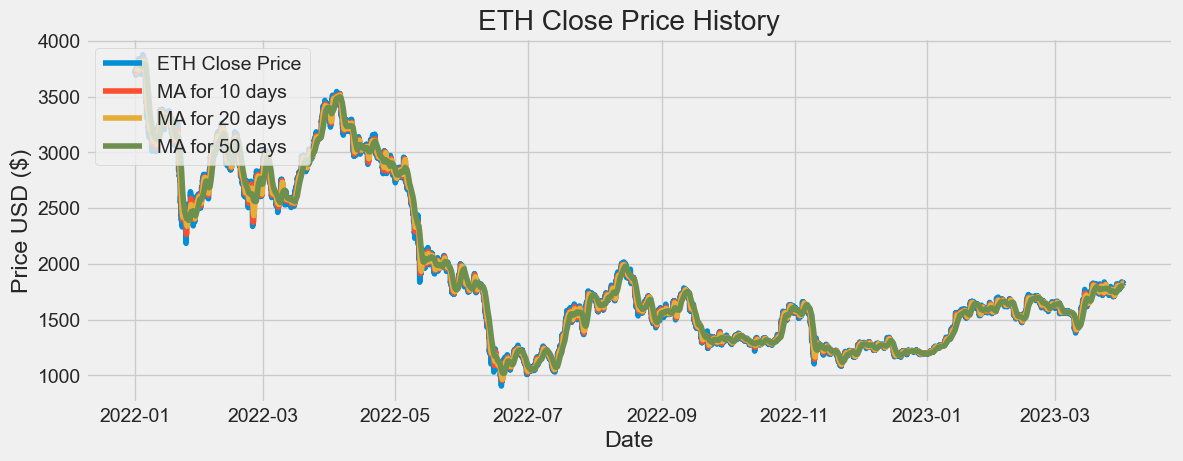

In [151]:
# Moving Average
ma_days = [10, 20, 50]
for ma in ma_days:
    column_name = f"MA for {ma} days"
    sliced_df[column_name] = sliced_df['close_price'].rolling(ma).mean()

plt.figure(figsize=(12.5, 4.5))
plt.plot(sliced_df['close_time'], sliced_df['close_price'], label='ETH Close Price')
for ma in ma_days:
    column_name = f"MA for {ma} days"
    plt.plot(sliced_df['close_time'], sliced_df[column_name], label=column_name)
plt.title('ETH Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.legend(loc='upper left')
plt.show()


/var/folders/fx/3kl00f6x4bq3c7ymjd8v16qr0000gn/T/ipykernel_52720/218139954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced_df['daily_return'] = sliced_df['close_price'].pct_change()


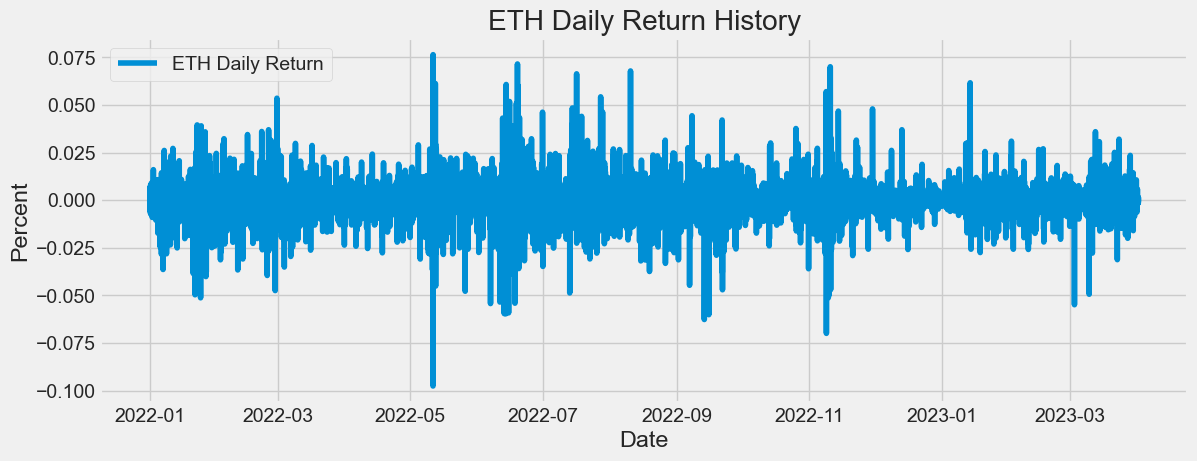

In [152]:
# Find percentage change of the price each day
sliced_df['daily_return'] = sliced_df['close_price'].pct_change()

# Plot the daily return percentage
plt.figure(figsize=(12.5, 4.5))
plt.plot(sliced_df['close_time'], sliced_df['daily_return'], label='ETH Daily Return')
plt.title('ETH Daily Return History')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.legend(loc='upper left')
plt.show()

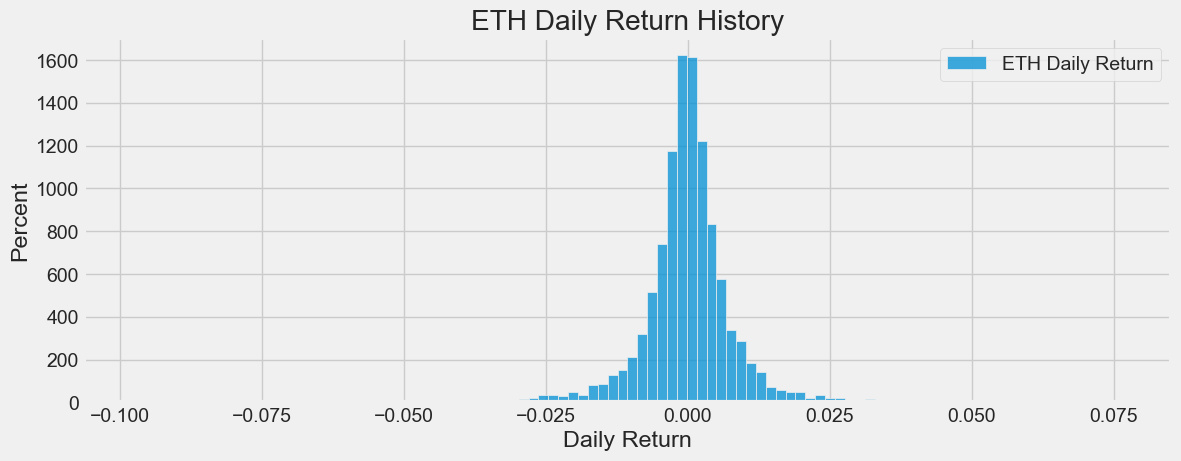

In [153]:
# Plot the distribution of the daily return percentage
plt.figure(figsize=(12.5, 4.5))
sns.histplot(sliced_df['daily_return'].dropna(), bins=100, label='ETH Daily Return')
plt.title('ETH Daily Return History')
plt.xlabel('Daily Return')
plt.ylabel('Percent')
plt.legend(loc='upper right')
plt.show()


In [154]:
# Price Prediction
data = sliced_df.filter(['close_price'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * .9))

training_data_len

8747

In [155]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.94873935],
       [0.94936202],
       [0.95051648],
       ...,
       [0.30957999],
       [0.31046855],
       [0.30999734]])

In [156]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(100, len(train_data)):
    x_train.append(train_data[i-100:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [157]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

8647/8647 [==============================] - 111s 13ms/step - loss: 6.7715e-04


In [159]:
# Test data set
test_data = scaled_data[training_data_len - 100:, :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(100, len(test_data)):
    x_test.append(test_data[i-100:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

69/69 [==============================] - 1s 8ms/step


6.8013366017948025

/var/folders/fx/3kl00f6x4bq3c7ymjd8v16qr0000gn/T/ipykernel_52720/3791788395.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


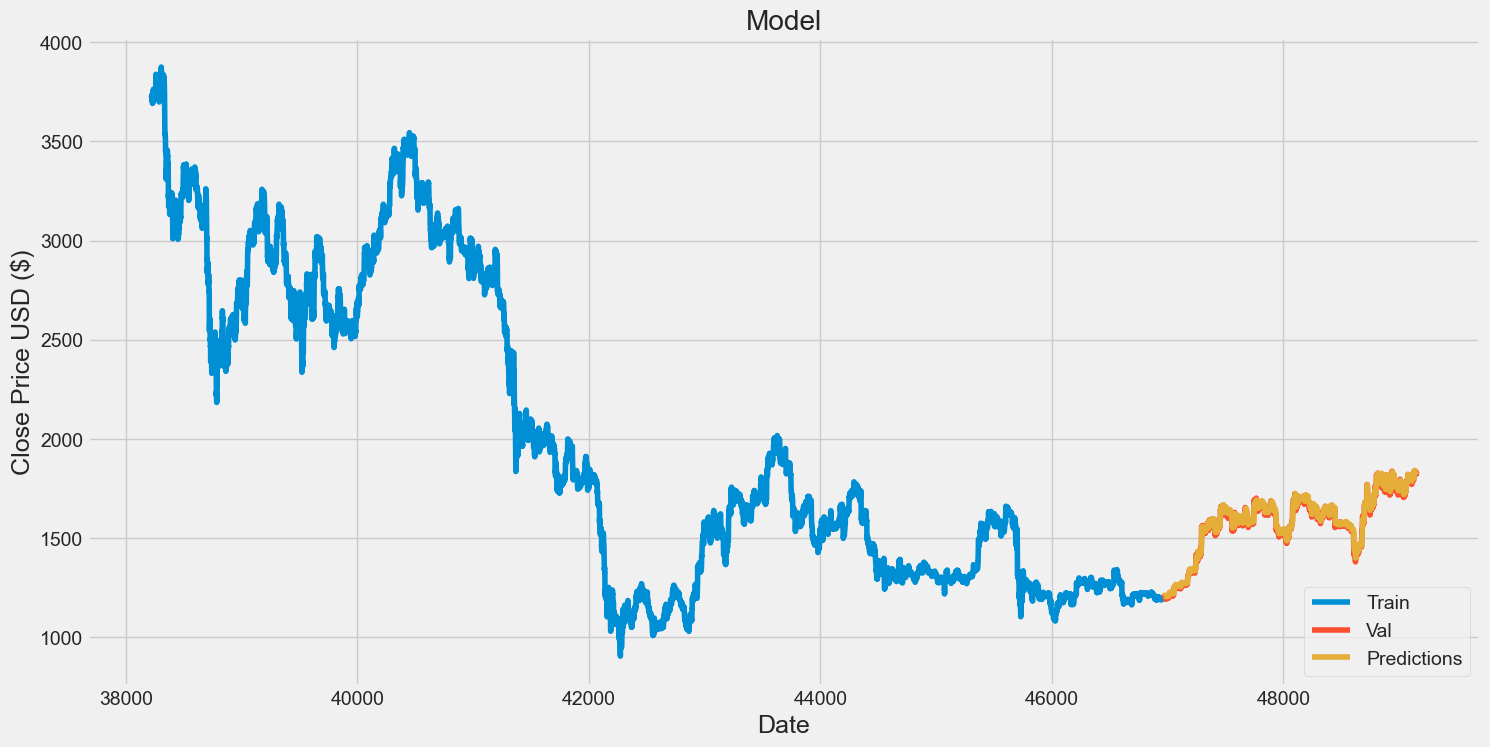

In [160]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close_price'])
plt.plot(valid[['close_price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [234]:
len(predictions)

60

In [161]:
valid

,close_price,Predictions
46967,1197.20,1206.379883
46968,1197.58,1206.715576
46969,1201.10,1206.848267
46970,1203.44,1207.967896
46971,1202.86,1209.782837
...,...,...
49148,1824.48,1833.531372
49149,1826.95,1833.765625
49150,1824.04,1834.874390
49151,1826.68,1834.881714


In [169]:
# Average Change 
valid['avg_change'] = valid['close_price'].pct_change()


/var/folders/fx/3kl00f6x4bq3c7ymjd8v16qr0000gn/T/ipykernel_52720/540091291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['avg_change'] = valid['close_price'].pct_change()


In [219]:
slided_valid = valid[-500:]
slided_valid

,close_price,Predictions,avg_change
48653,1449.43,1438.871704,0.012221
48654,1448.59,1445.388672,-0.000580
48655,1449.22,1451.112183,0.000435
48656,1466.21,1454.696289,0.011724
48657,1465.03,1461.799561,-0.000805
...,...,...,...
49148,1824.48,1833.531372,-0.000427
49149,1826.95,1833.765625,0.001354
49150,1824.04,1834.874390,-0.001593
49151,1826.68,1834.881714,0.001447


In [220]:
budget = 1000
eth = 0
print(slided_valid.shape)
for index, row in slided_valid.iterrows():
    if row['Predictions'] > slided_valid.shift(1).loc[index, 'Predictions']:
        if budget > 0:
            # print(f"Buy at {row['close_price']}")
            eth = budget / row['close_price']
            budget = 0
    elif row['Predictions'] < slided_valid.shift(1).loc[index, 'Predictions']:
        if eth > 0:
            # print(f"Sell at {row['close_price']}")
            budget = eth * row['close_price']
            eth = 0

print(f"Budget: {budget}")
print(f"ETH: {eth}")
print(f"Total: {budget + eth * slided_valid.iloc[-1]['close_price']}")
hold_and_wait = 1000 / slided_valid.iloc[0]['close_price'] * slided_valid.iloc[-1]['close_price']
print(f"Hold and Wait: {hold_and_wait}")


(500, 3)
Budget: 0
ETH: 0.586434048871724
Total: 1070.4063407245803
Hold and Wait: 1259.3088317476524


In [221]:
def test_model_valid(seed):
    slided_valid = valid[seed:seed + 100]
    budget = 1000
    eth = 0
    print(slided_valid.shape)
    for index, row in slided_valid.iterrows():
        if row['Predictions'] > slided_valid.shift(1).loc[index, 'Predictions']:
            if budget > 0:
                # print(f"Buy at {row['close_price']}")
                eth = budget / row['close_price']
                budget = 0
        elif row['Predictions'] < slided_valid.shift(1).loc[index, 'Predictions']:
            if eth > 0:
                # print(f"Sell at {row['close_price']}")
                budget = eth * row['close_price']
                eth = 0

    total = budget + eth * slided_valid.iloc[-1]['close_price']
    # print(f"Total: {total}")
    hold_and_wait = 1000 / slided_valid.iloc[0]['close_price'] * slided_valid.iloc[-1]['close_price']
    # print(f"Hold and Wait: {hold_and_wait}")
    return total, hold_and_wait

In [229]:
totals = []
hold_and_waits = []
for i in range(0, 100):
    seed = np.random.randint(0, len(valid) - 100)
    total, hold_and_wait = test_model_valid(seed)
    totals.append(total)
    hold_and_waits.append(hold_and_wait)

avg_total = np.mean(totals)
avg_hold_and_wait = np.mean(hold_and_waits)
print(f"Average Total: {avg_total}")
print(f"Average Hold and Wait: {avg_hold_and_wait}")


(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
Average Total: 1017.3914967073539
Average Hold and Wait: 1031.9853487258567


In [208]:
# Predict the price for 2021-04-01
eth_quote = pd.read_csv('./data/6hour.csv')
eth_quote.columns = ['open_time', 'open_price', 'high_price', 'low_price', 'close_price', 'volume', 'close_time']
eth_quote = eth_quote.filter(['close_price'])
last_60_days = eth_quote[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)



1/1 [==============================] - 0s 14ms/step
[[1829.7891]]


In [235]:
predictions = []
eth_quote = pd.read_csv('./data/6hour.csv')
eth_quote.columns = ['open_time', 'open_price', 'high_price', 'low_price', 'close_price', 'volume', 'close_time']
eth_quote = eth_quote.filter(['close_price'])
look_back = 60
for i in range(0, look_back):
    # Last 60 - i days
    last_days = eth_quote[-look_back+i:].values
    last_days_array = np.array(last_days)
    last_days_array = np.reshape(last_days_array, look_back - i)
    # combine with the predicted prices
    last_60_days = np.concatenate((last_days_array, predictions), axis=0)
    last_60_days = np.reshape(last_60_days, (look_back, 1))
    last_60_days_scaled = scaler.transform(last_60_days)
    X_test = []
    X_test.append(last_60_days_scaled)
    X_test = np.array(X_test)
    print(X_test.shape)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    pred_price = model.predict(X_test)
    pred_price = scaler.inverse_transform(pred_price)
    predictions.append(pred_price[0][0])


(1, 60, 1)
1/1 [==============================] - 0s 12ms/step
(1, 60, 1)
1/1 [==============================] - 0s 13ms/step
(1, 60, 1)
1/1 [==============================] - 0s 13ms/step
(1, 60, 1)
1/1 [==============================] - 0s 12ms/step
(1, 60, 1)
1/1 [==============================] - 0s 12ms/step
(1, 60, 1)
1/1 [==============================] - 0s 12ms/step
(1, 60, 1)
1/1 [==============================] - 0s 17ms/step
(1, 60, 1)
1/1 [==============================] - 0s 16ms/step
(1, 60, 1)
1/1 [==============================] - 0s 12ms/step
(1, 60, 1)
1/1 [==============================] - 0s 13ms/step
(1, 60, 1)
1/1 [==============================] - 0s 13ms/step
(1, 60, 1)
1/1 [==============================] - 0s 13ms/step
(1, 60, 1)
1/1 [==============================] - 0s 14ms/step
(1, 60, 1)
1/1 [==============================] - 0s 13ms/step
(1, 60, 1)
1/1 [==============================] - 0s 12ms/step
(1, 60, 1)
1/1 [==============================] - 0s 12

In [164]:
predictions

[1829.7891,
 1831.4303,
 1834.0538,
 1837.0385,
 1840.2142,
 1843.5255,
 1846.9451,
 1850.4519,
 1854.0265,
 1857.652,
 1861.3148,
 1865.0034,
 1868.71,
 1872.4296,
 1876.1595,
 1879.8995,
 1883.6505,
 1887.4144,
 1891.1935,
 1894.9907,
 1898.8088,
 1902.6497,
 1906.5154,
 1910.4081,
 1914.3281,
 1918.2771,
 1922.2554,
 1926.2633,
 1930.3011,
 1934.3693,
 1938.4674,
 1942.596,
 1946.7546,
 1950.944,
 1955.1642,
 1959.4154,
 1963.6982,
 1968.0125,
 1972.359,
 1976.7382,
 1981.1503,
 1985.5958,
 1990.0756,
 1994.5896,
 1999.1387,
 2003.723,
 2008.3435,
 2013.0001,
 2017.6938,
 2022.4249,
 2027.1937,
 2032.0007,
 2036.8468,
 2041.732,
 2046.6572,
 2051.6228,
 2056.6292,
 2061.677,
 2066.7666,
 2071.899]

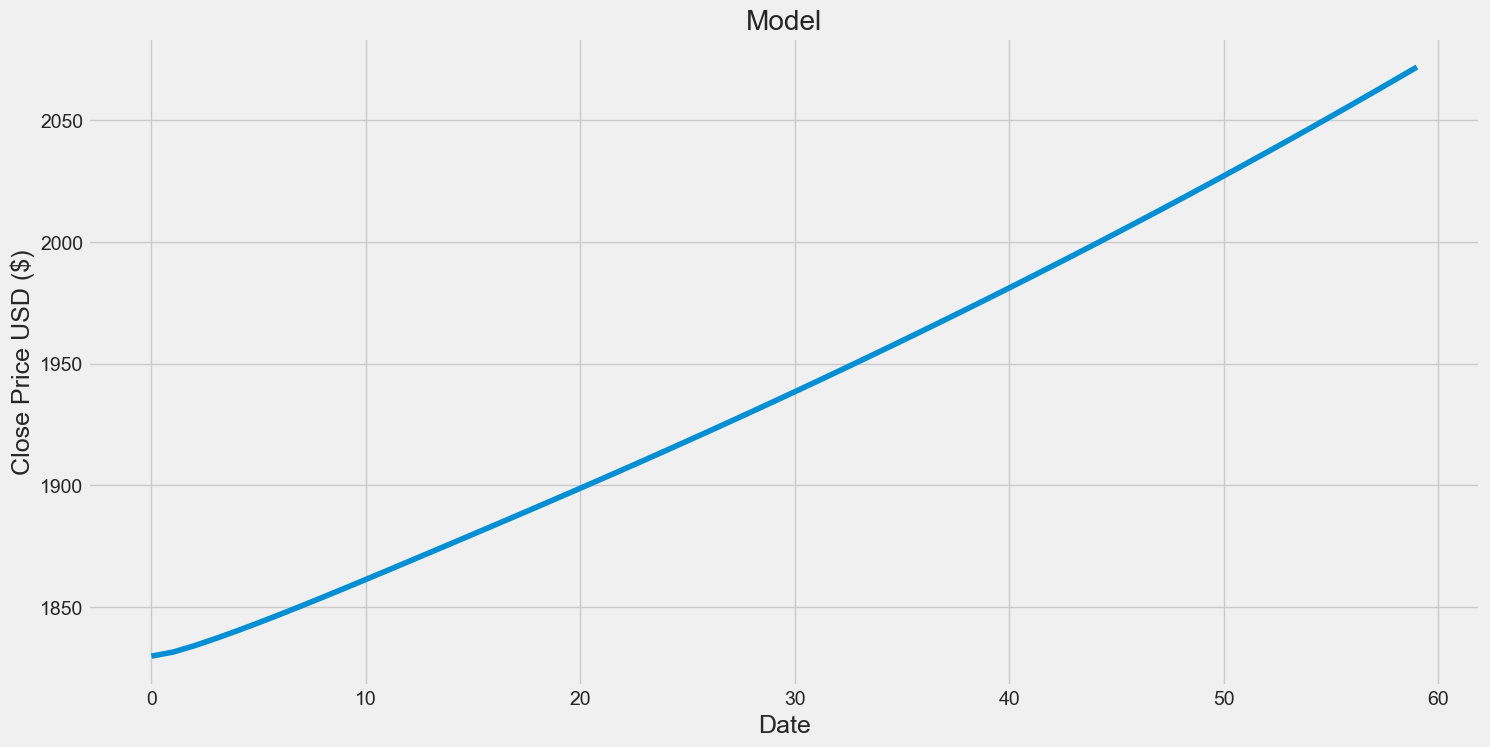

In [165]:
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(predictions)
plt.show()
